In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from rfpimp import importances
from scipy import stats
%matplotlib inline
pd.set_option("display.max_columns", 2000)

In [21]:
df_full=pd.read_csv('data/Seasons_Stats.csv')
df_full.drop(columns='Unnamed: 0', inplace=True)

In [22]:
# df_full=df_full[df_full['Year']!=np.nan]

In [23]:
df_full.drop(labels='blank2', axis=1, inplace=True)
df_full.drop(labels='blanl', axis=1, inplace=True)
df=df_full[df_full['Year']>=1980]
df['Year']=df['Year'].astype(int)

df['Year']=pd.to_datetime(df['Year'], format='%Y')
df['Year']=df['Year'].dt.year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [24]:
df_coach=pd.read_csv('data/coach_data_cleaned.csv')

In [25]:
df_coach.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

In [26]:
df_coach=df_coach[df_coach['season']!='Career']
df_coach['season']=df_coach['season'].apply(lambda x: x[:2]+x[-2:]) #code for fixing ther dates

In [27]:
df_coach['season']=df_coach['season'].astype(int)

In [28]:
df_coach=df_coach[df_coach['season']>=1980]

In [29]:
df_coach[df_coach['season']==1980]

,Team,coach_age,coach_name,season,playoff_games,playoff_wins,playoff_loses,playoff_W/L%,season_games,season_wins,season_loses,season_W/L%,season_position
24,DET,42.0,Richie Adubato,1980,NaN,NaN,NaN,NaN,70,12.0,58.0,0.171,6.0
37,CLE,48.0,Stan Albeck,1980,NaN,NaN,NaN,NaN,82,37.0,45.0,0.451,5.0
61,GSW,43.0,Al Attles,1980,NaN,NaN,NaN,NaN,61,18.0,43.0,0.295,6.0
89,GSW,55.0,Johnny Bach,1980,NaN,NaN,NaN,NaN,21,6.0,15.0,0.286,6.0
108,SAS,51.0,Bob Bass,1980,3.0,1.0,2.0,0.333,16,8.0,8.0,0.500,3.0
228,ATL,46.0,Hubie Brown,1980,5.0,1.0,4.0,0.200,82,50.0,32.0,0.610,1.0
474,PHI,36.0,Billy Cunningham,1980,18.0,12.0,6.0,0.667,82,59.0,23.0,0.720,2.0
611,BOS,45.0,Bill Fitch,1980,9.0,5.0,4.0,0.556,82,61.0,21.0,0.744,1.0
638,KCK,48.0,Cotton Fitzsimmons,1980,3.0,1.0,2.0,0.333,82,47.0,35.0,0.573,2.0
782,HOU,42.0,Del Harris,1980,7.0,2.0,5.0,0.286,82,41.0,41.0,0.500,2.0


In [30]:
df_coach.columns.values

array(['Team', 'coach_age', 'coach_name', 'season', 'playoff_games',
       'playoff_wins', 'playoff_loses', 'playoff_W/L%', 'season_games',
       'season_wins', 'season_loses', 'season_W/L%', 'season_position'],
      dtype=object)

In [31]:
cols=['Team', 'coach_age', 'coach_name', 'season','season_games',
       'season_wins', 'season_loses', 'season_W/L%', 'season_position']

In [32]:
df_coach=df_coach[cols]

In [279]:
df_coach.head()

,Team,coach_age,coach_name,season,season_games,season_wins,season_loses,season_W/L%,season_position
0,POR,42.0,Rick Adelman,1989,35,14.0,21.0,0.400,5.0
1,POR,43.0,Rick Adelman,1990,82,59.0,23.0,0.720,2.0
2,POR,44.0,Rick Adelman,1991,82,63.0,19.0,0.768,1.0
3,POR,45.0,Rick Adelman,1992,82,57.0,25.0,0.695,1.0
4,POR,46.0,Rick Adelman,1993,82,51.0,31.0,0.622,3.0


In [34]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.5,-0.1,-1.6,0.1,153.0,318.0,0.481,0.0,1.0,0.000,153.0,317.0,0.483,0.481,56.0,82.0,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.6,2.8,4.4,3.5,465.0,875.0,0.531,0.0,2.0,0.000,465.0,873.0,0.533,0.531,188.0,236.0,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,2.3,5.3,3.8,30.2,1.7,0.2,19.7,17.0,5.9,2.9,8.9,0.148,1.1,-1.1,0.0,1.5,383.0,794.0,0.482,4.0,18.0,0.222,379.0,776.0,0.488,0.485,361.0,435.0,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,0.000,0.833,6.0,16.9,11.5,9.0,1.0,1.5,24.8,7.9,0.1,0.5,0.6,0.053,-2.9,1.5,-1.4,0.1,27.0,60.0,0.450,0.0,0.0,NaN,27.0,60.0,0.450,0.450,32.0,50.0,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [284]:
temp=df_coach[df_coach.duplicated(subset=['coach_name','season'])]

In [288]:
temp

,Team,coach_age,coach_name,season,season_games,season_wins,season_loses,season_W/L%,season_position
148,WSB,52.0,Bernie Bickerstaff,1997,35,22.0,13.0,0.629,4.0
252,LAC,51.0,Larry Brown,1992,35,23.0,12.0,0.657,5.0


In [37]:
# merging the tables:
result=pd.merge(df,df_coach, how='inner', left_on=['Year','Tm'], right_on=['season','Team'])

In [38]:
result.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name,season,season_games,season_wins,season_loses,season_W/L%,season_position
0,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,44.0,Jack McKinney,1980,14,10.0,4.0,0.714,1.0
1,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,40.0,Paul Westhead,1980,68,50.0,18.0,0.735,1.0
2,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,44.0,Jack McKinney,1980,14,10.0,4.0,0.714,1.0
3,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,40.0,Paul Westhead,1980,68,50.0,18.0,0.735,1.0
4,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,44.0,Jack McKinney,1980,14,10.0,4.0,0.714,1.0


In [39]:
result.columns.values
cols=['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Team',
       'coach_age', 'coach_name','season_games', 'season_wins',
       'season_loses', 'season_W/L%', 'season_position']

In [40]:
tot=result[cols]

In [41]:
tot.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name,season_games,season_wins,season_loses,season_W/L%,season_position
0,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0
1,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0
2,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0
3,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0
4,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0


In [42]:
tot['prev_year']=tot['Year']-1

In [43]:
tot[tot['Year']==1980]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name,season_games,season_wins,season_loses,season_W/L%,season_position,prev_year
0,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
1,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
2,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
3,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
4,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
5,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
6,1980,Kenny Carr,PF,24.0,LAL,5.0,NaN,57.0,5.2,0.474,0.000,0.125,10.5,21.1,16.3,2.0,1.6,0.9,34.8,18.2,-0.2,0.1,-0.1,-0.067,-8.2,-1.6,-9.8,-0.1,7.0,16.0,0.438,0.0,0.0,NaN,7.0,16.0,0.438,0.438,2.0,2.0,1.000,5.0,12.0,17.0,1.0,2.0,1.0,9.0,6.0,16.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
7,1980,Kenny Carr,PF,24.0,LAL,5.0,NaN,57.0,5.2,0.474,0.000,0.125,10.5,21.1,16.3,2.0,1.6,0.9,34.8,18.2,-0.2,0.1,-0.1,-0.067,-8.2,-1.6,-9.8,-0.1,7.0,16.0,0.438,0.0,0.0,NaN,7.0,16.0,0.438,0.438,2.0,2.0,1.000,5.0,12.0,17.0,1.0,2.0,1.0,9.0,6.0,16.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
8,1980,Jim Chones,C,30.0,LAL,82.0,NaN,2394.0,11.3,0.521,0.003,0.222,7.1,17.6,12.8,7.6,1.1,1.4,17.3,16.9,0.7,2.8,3.5,0.071,-2.1,0.3,-1.8,0.1,372.0,760.0,0.489,0.0,2.0,0.000,372.0,758.0,0.491,0.489,125.0,169.0,0.740,143.0,421.0,564.0,151.0,56.0,65.0,175.0,271.0,869.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
9,1980,Jim Chones,C,30.0,LAL,82.0,NaN,2394.0,11.3,0.521,0.003,0.222,7.1,17.6,12.8,7.6,1.1,1.4,17.3,16.9,0.7,2.8,3.5,0.071,-2.1,0.3,-1.8,0.1,372.0,760.0,0.489,0.0,2.0,0.000,372.0,758.0,0.491,0.489,125.0,169.0,0.740,143.0,421.0,564.0,151.0,56.0,65.0,175.0,271.0,869.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979


In [44]:
def remove_tot(combined):
    tot_player=combined[combined['Tm']=='TOT']['Player'].values
    for name in tot_player:
        temp=combined[combined['Player']==name]
        tot_index=temp[temp['Tm']=='TOT'].index.values
        for idx in tot_index:
            year=temp.loc[idx]['Year']
            year_index=temp[temp['Year']==year].index.values
            year_temp=temp[temp['Year']==year]
            max_year=((year_temp[year_temp['Tm']!='TOT'])['G'].max())
            team=(year_temp[year_temp['G']==max_year])['Tm'].values
            team=str(team)
            team=team[1:-1]
            combined.at[idx,'Tm']=team
            for element in year_index:
                if element==idx:
                    continue
                else:
                    combined.drop(axis=0, index=element, inplace=True)
    return(combined)

In [45]:
tot=remove_tot(tot)

In [46]:
tot.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name,season_games,season_wins,season_loses,season_W/L%,season_position,prev_year
0,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
1,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
2,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
3,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
4,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
5,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
6,1980,Kenny Carr,PF,24.0,LAL,5.0,NaN,57.0,5.2,0.474,0.000,0.125,10.5,21.1,16.3,2.0,1.6,0.9,34.8,18.2,-0.2,0.1,-0.1,-0.067,-8.2,-1.6,-9.8,-0.1,7.0,16.0,0.438,0.0,0.0,NaN,7.0,16.0,0.438,0.438,2.0,2.0,1.000,5.0,12.0,17.0,1.0,2.0,1.0,9.0,6.0,16.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
7,1980,Kenny Carr,PF,24.0,LAL,5.0,NaN,57.0,5.2,0.474,0.000,0.125,10.5,21.1,16.3,2.0,1.6,0.9,34.8,18.2,-0.2,0.1,-0.1,-0.067,-8.2,-1.6,-9.8,-0.1,7.0,16.0,0.438,0.0,0.0,NaN,7.0,16.0,0.438,0.438,2.0,2.0,1.000,5.0,12.0,17.0,1.0,2.0,1.0,9.0,6.0,16.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979
8,1980,Jim Chones,C,30.0,LAL,82.0,NaN,2394.0,11.3,0.521,0.003,0.222,7.1,17.6,12.8,7.6,1.1,1.4,17.3,16.9,0.7,2.8,3.5,0.071,-2.1,0.3,-1.8,0.1,372.0,760.0,0.489,0.0,2.0,0.0,372.0,758.0,0.491,0.489,125.0,169.0,0.740,143.0,421.0,564.0,151.0,56.0,65.0,175.0,271.0,869.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
9,1980,Jim Chones,C,30.0,LAL,82.0,NaN,2394.0,11.3,0.521,0.003,0.222,7.1,17.6,12.8,7.6,1.1,1.4,17.3,16.9,0.7,2.8,3.5,0.071,-2.1,0.3,-1.8,0.1,372.0,760.0,0.489,0.0,2.0,0.0,372.0,758.0,0.491,0.489,125.0,169.0,0.740,143.0,421.0,564.0,151.0,56.0,65.0,175.0,271.0,869.0,LAL,40.0,Paul Westhead,68,50.0,18.0,0.735,1.0,1979


In [47]:
tot=tot.drop_duplicates(subset=['Year','Player'])

In [48]:
tot[tot.duplicated(subset=['Year','Player'])]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name,season_games,season_wins,season_loses,season_W/L%,season_position,prev_year


In [49]:
tot[tot['Player']=='Tristan Thompson']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name,season_games,season_wins,season_loses,season_W/L%,season_position,prev_year
16424,2012,Tristan Thompson,PF,20.0,CLE,60.0,25.0,1424.0,13.3,0.469,0.005,0.434,14.4,16.8,15.5,3.3,1.0,3.3,13.3,19.2,0.3,0.9,1.1,0.038,-3.2,-1.0,-4.2,-0.8,194.0,442.0,0.439,0.0,2.0,0.0,194.0,440.0,0.441,0.439,106.0,192.0,0.552,187.0,202.0,389.0,27.0,27.0,62.0,81.0,134.0,494.0,CLE,50.0,Byron Scott,66,21.0,45.0,0.318,5.0,2011
17057,2013,Tristan Thompson,PF,21.0,CLE,82.0,82.0,2564.0,16.1,0.516,0.004,0.364,13.2,22.1,17.5,6.9,1.2,2.2,11.7,18.3,3.2,2.0,5.2,0.098,-0.7,0.1,-0.5,1.0,390.0,799.0,0.488,0.0,3.0,0.0,390.0,796.0,0.490,0.488,177.0,291.0,0.608,306.0,467.0,773.0,108.0,60.0,71.0,123.0,234.0,957.0,CLE,51.0,Byron Scott,82,24.0,58.0,0.293,5.0,2012
17577,2014,Tristan Thompson,PF,22.0,CLE,82.0,82.0,2594.0,14.9,0.528,0.001,0.445,11.4,21.5,16.3,4.5,0.8,1.1,10.6,17.5,3.4,2.3,5.7,0.106,-1.5,-0.5,-2.0,0.0,363.0,761.0,0.477,0.0,1.0,0.0,363.0,760.0,0.478,0.477,235.0,339.0,0.693,269.0,485.0,754.0,72.0,42.0,35.0,108.0,188.0,961.0,CLE,43.0,Mike Brown,82,33.0,49.0,0.402,3.0,2013
17884,2015,Tristan Thompson,PF,23.0,CLE,82.0,15.0,2194.0,15.6,0.580,0.000,0.508,14.5,19.7,17.2,2.7,0.8,2.2,12.2,14.0,4.7,2.1,6.8,0.148,-0.3,-0.3,-0.6,0.8,267.0,488.0,0.547,0.0,0.0,NaN,267.0,488.0,0.547,0.547,159.0,248.0,0.641,274.0,383.0,657.0,39.0,34.0,61.0,83.0,189.0,693.0,CLE,55.0,David Blatt,82,53.0,29.0,0.646,1.0,2014
18905,2016,Tristan Thompson,PF,24.0,CLE,82.0,34.0,2269.0,15.9,0.611,0.000,0.576,13.5,23.3,18.4,4.0,0.9,1.8,10.4,11.7,5.6,3.1,8.7,0.185,0.2,1.3,1.5,2.0,247.0,420.0,0.588,0.0,0.0,NaN,247.0,420.0,0.588,0.588,149.0,242.0,0.616,268.0,470.0,738.0,62.0,38.0,51.0,61.0,202.0,643.0,CLE,56.0,David Blatt,41,30.0,11.0,0.732,1.0,2015
19118,2017,Tristan Thompson,C,25.0,CLE,78.0,78.0,2336.0,15.3,0.594,0.007,0.487,14.0,19.6,16.9,4.6,0.8,2.9,10.8,11.3,5.0,2.3,7.3,0.150,0.0,1.5,1.5,2.1,262.0,437.0,0.600,0.0,3.0,0.0,262.0,434.0,0.604,0.600,106.0,213.0,0.498,287.0,429.0,716.0,77.0,39.0,84.0,64.0,176.0,630.0,CLE,39.0,Tyronn Lue,82,51.0,31.0,0.622,1.0,2016


In [50]:
tot2=tot.copy()

In [51]:
tot=tot2.copy()

In [224]:
tot3=tot2.copy()

In [52]:
tot.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name,season_games,season_wins,season_loses,season_W/L%,season_position,prev_year
0,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
2,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
4,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
6,1980,Kenny Carr,PF,24.0,LAL,5.0,NaN,57.0,5.2,0.474,0.000,0.125,10.5,21.1,16.3,2.0,1.6,0.9,34.8,18.2,-0.2,0.1,-0.1,-0.067,-8.2,-1.6,-9.8,-0.1,7.0,16.0,0.438,0.0,0.0,NaN,7.0,16.0,0.438,0.438,2.0,2.0,1.000,5.0,12.0,17.0,1.0,2.0,1.0,9.0,6.0,16.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979
8,1980,Jim Chones,C,30.0,LAL,82.0,NaN,2394.0,11.3,0.521,0.003,0.222,7.1,17.6,12.8,7.6,1.1,1.4,17.3,16.9,0.7,2.8,3.5,0.071,-2.1,0.3,-1.8,0.1,372.0,760.0,0.489,0.0,2.0,0.0,372.0,758.0,0.491,0.489,125.0,169.0,0.740,143.0,421.0,564.0,151.0,56.0,65.0,175.0,271.0,869.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979


In [53]:
tot=pd.merge(tot,tot[['Year','Team','coach_name','season_W/L%']],how='left', left_on=['Team','prev_year'], right_on=['Team','Year'])

In [241]:
tot3=pd.merge(tot3,tot3[['Year','Team','coach_name','season_W/L%','Player']], how='left', left_on=['Player','prev_year'], right_on=['Player','Year'])

In [242]:
tot3.head()

,Year_x,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team_x,coach_age,coach_name_x,season_games,season_wins,season_loses,season_W/L%_x,season_position,prev_year,Year_y,Team_y,coach_name_y,season_W/L%_y
0,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979,NaN,NaN,NaN,NaN
1,1980,Ron Boone,SG,33.0,LAL,6.0,NaN,106.0,3.0,0.395,0.000,0.175,4.5,6.6,5.7,7.8,2.2,0.0,23.2,21.2,-0.3,0.1,-0.2,-0.098,-7.5,-1.8,-9.2,-0.2,14.0,40.0,0.350,0.0,0.0,NaN,14.0,40.0,0.350,0.350,6.0,7.0,0.857,4.0,7.0,11.0,7.0,5.0,0.0,13.0,13.0,34.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979,NaN,NaN,NaN,NaN
2,1980,Marty Byrnes,SF,23.0,LAL,32.0,NaN,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-0.1,0.2,0.0,0.009,-4.3,-1.7,-6.0,-0.2,25.0,50.0,0.500,0.0,0.0,NaN,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979,NaN,NaN,NaN,NaN
3,1980,Kenny Carr,PF,24.0,LAL,5.0,NaN,57.0,5.2,0.474,0.000,0.125,10.5,21.1,16.3,2.0,1.6,0.9,34.8,18.2,-0.2,0.1,-0.1,-0.067,-8.2,-1.6,-9.8,-0.1,7.0,16.0,0.438,0.0,0.0,NaN,7.0,16.0,0.438,0.438,2.0,2.0,1.000,5.0,12.0,17.0,1.0,2.0,1.0,9.0,6.0,16.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979,NaN,NaN,NaN,NaN
4,1980,Jim Chones,C,30.0,LAL,82.0,NaN,2394.0,11.3,0.521,0.003,0.222,7.1,17.6,12.8,7.6,1.1,1.4,17.3,16.9,0.7,2.8,3.5,0.071,-2.1,0.3,-1.8,0.1,372.0,760.0,0.489,0.0,2.0,0.0,372.0,758.0,0.491,0.489,125.0,169.0,0.740,143.0,421.0,564.0,151.0,56.0,65.0,175.0,271.0,869.0,LAL,44.0,Jack McKinney,14,10.0,4.0,0.714,1.0,1979,NaN,NaN,NaN,NaN


In [54]:
tot.drop_duplicates(inplace=True)

In [245]:
tot3.shape

(15081, 63)

In [57]:
tot=tot.dropna()

In [249]:
tot.shape

(10629, 62)

In [247]:
tot3=tot3.dropna()

In [248]:
tot3.shape

(8870, 63)

In [59]:
switched_coach=tot[tot['coach_name_x']!=tot['coach_name_y']]

In [250]:
switched_coach3=tot3[tot3['coach_name_x']!=tot3['coach_name_y']]

In [60]:
same_coach=tot[tot['coach_name_x']==tot['coach_name_y']]

In [61]:
same_coach.head(10)

,Year_x,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,coach_age,coach_name_x,season_games,season_wins,season_loses,season_W/L%_x,season_position,prev_year,Year_y,coach_name_y,season_W/L%_y
1081,1981,Tiny Archibald*,PG,32.0,BOS,80.0,72.0,2820.0,14.3,0.582,0.012,0.547,1.5,5.4,3.6,28.5,1.3,0.4,21.8,17.5,4.6,2.3,6.9,0.118,0.4,-1.6,-1.3,0.5,382.0,766.0,0.499,0.0,9.0,0.000,382.0,757.0,0.505,0.499,342.0,419.0,0.816,36.0,140.0,176.0,618.0,75.0,18.0,265.0,201.0,1106.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1093,1981,Larry Bird*,PF,24.0,BOS,82.0,82.0,3239.0,19.9,0.528,0.049,0.218,7.0,23.8,15.7,20.4,2.4,1.1,14.9,24.3,4.7,6.1,10.8,0.160,2.1,3.0,5.1,5.8,719.0,1503.0,0.478,20.0,74.0,0.270,699.0,1429.0,0.489,0.485,283.0,328.0,0.863,191.0,704.0,895.0,451.0,161.0,63.0,289.0,239.0,1741.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1105,1981,M.L. Carr,SF,30.0,BOS,41.0,7.0,655.0,11.6,0.505,0.065,0.310,4.7,9.5,7.2,11.3,2.2,1.5,16.1,18.2,0.2,0.9,1.1,0.082,-1.8,0.5,-1.3,0.1,97.0,216.0,0.449,1.0,14.0,0.071,96.0,202.0,0.475,0.451,53.0,67.0,0.791,26.0,57.0,83.0,56.0,30.0,18.0,47.0,74.0,248.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1129,1981,Chris Ford,SG,32.0,BOS,82.0,75.0,2723.0,8.8,0.488,0.154,0.123,3.1,3.7,3.4,13.7,1.7,0.5,14.6,13.0,1.3,2.4,3.7,0.066,-0.7,0.2,-0.5,1.0,314.0,707.0,0.444,36.0,109.0,0.330,278.0,598.0,0.465,0.470,64.0,87.0,0.736,72.0,91.0,163.0,295.0,100.0,23.0,127.0,212.0,728.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1141,1981,Gerald Henderson,PG,25.0,BOS,82.0,10.0,1608.0,10.4,0.491,0.028,0.271,3.2,6.1,4.7,17.8,2.3,0.4,19.8,20.5,-0.6,1.8,1.3,0.037,-2.5,-0.6,-3.2,-0.5,261.0,579.0,0.451,1.0,16.0,0.063,260.0,563.0,0.462,0.452,113.0,157.0,0.720,43.0,89.0,132.0,213.0,79.0,12.0,160.0,177.0,636.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1153,1981,Wayne Kreklow,SG,24.0,BOS,25.0,0.0,100.0,-1.9,0.292,0.085,0.213,2.4,10.9,6.8,11.3,1.0,0.6,16.3,25.0,-0.5,0.1,-0.3,-0.167,-10.4,-2.7,-13.0,-0.3,11.0,47.0,0.234,1.0,4.0,0.250,10.0,43.0,0.233,0.245,7.0,10.0,0.700,2.0,10.0,12.0,9.0,2.0,1.0,10.0,20.0,30.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1165,1981,Cedric Maxwell,SF,25.0,BOS,81.0,81.0,2730.0,17.6,0.651,0.001,0.600,9.7,12.1,11.0,10.8,1.4,1.4,16.0,16.8,7.6,3.3,11.0,0.193,3.5,1.3,4.8,4.7,441.0,750.0,0.588,0.0,1.0,0.000,441.0,749.0,0.589,0.588,352.0,450.0,0.782,222.0,303.0,525.0,219.0,79.0,68.0,180.0,256.0,1234.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1177,1981,Kevin McHale*,PF,23.0,BOS,82.0,1.0,1645.0,16.4,0.556,0.003,0.239,11.2,13.6,12.4,4.8,0.8,5.1,13.0,20.9,2.3,2.4,4.7,0.137,-0.3,0.6,0.3,1.0,355.0,666.0,0.533,0.0,2.0,0.000,355.0,664.0,0.535,0.533,108.0,159.0,0.679,155.0,204.0,359.0,55.0,27.0,151.0,110.0,260.0,818.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1189,1981,Robert Parish*,C,27.0,BOS,82.0,78.0,2298.0,25.2,0.579,0.001,0.340,12.7,25.3,19.3,10.0,1.7,5.1,12.5,27.1,6.0,4.9,10.9,0.228,2.7,2.3,5.0,4.0,635.0,1166.0,0.545,0.0,1.0,0.000,635.0,1165.0,0.545,0.545,282.0,397.0,0.710,245.0,532.0,777.0,144.0,81.0,214.0,191.0,310.0,1552.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744
1201,1981,Rick Robey,C,25.0,BOS,82.0,4.0,1569.0,14.9,0.563,0.002,0.459,10.0,18.0,14.2,11.2,1.2,0.7,17.7,20.7,1.6,2.1,3.7,0.114,-0.1,-0.1,-0.1,0.7,298.0,547.0,0.545,0.0,1.0,0.000,298.0,546.0,0.546,0.545,144.0,251.0,0.574,132.0,258.0,390.0,126.0,38.0,19.0,141.0,204.0,740.0,BOS,46.0,Bill Fitch,82,62.0,20.0,0.756,1.0,1980,1980.0,Bill Fitch,0.744


In [139]:
switched=switched_coach[['Year_x','Team','season_W/L%_x','season_W/L%_y']].groupby(by=['Year_x','Team']).mean()

In [252]:
switched3=switched_coach3[['Year_x','Tm','season_W/L%_x','season_W/L%_y']].groupby(by=['Year_x','Tm']).mean()

In [140]:
same=same_coach[['Year_x','Team','coach_name_x','season_W/L%_x','season_W/L%_y']].groupby(by=['Year_x','Team']).mean()

In [156]:
switched_mean_after=switched['season_W/L%_x'].mean()

In [269]:
switched_mean_after3=switched3['season_W/L%_x'].mean()

In [270]:
switched_mean_after3

0.503237704918033

In [157]:
switched_mean_after

0.445068345323741

In [158]:
switched_mean_before=switched['season_W/L%_y'].mean()

In [271]:
switched_mean_before3=switched3['season_W/L%_y'].mean()

In [159]:
switched_mean_before

0.4336870503597122

In [272]:
switched_mean_before3

0.46691779314069976

In [160]:
same_mean_after=same['season_W/L%_x'].mean()

In [161]:
same_mean_before=same['season_W/L%_y'].mean()

In [163]:
same_mean_before, same_mean_after

(0.5377145242070113, 0.5361402337228715)

In [165]:
switched.shape

(278, 2)

In [166]:
same.shape

(599, 2)

In [168]:
switched['after/before']=switched['season_W/L%_x']/switched['season_W/L%_y']

In [182]:
switched=switched[switched['after/before']!=np.inf]

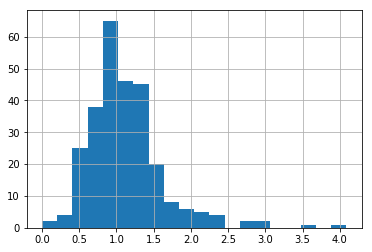

In [219]:
switched['after/before'].hist(bins=20)

In [184]:
stats.ttest_1samp(switched['after/before'],popmean=1)

Ttest_1sampResult(statistic=3.7027437798766827, pvalue=0.0002580411236272656)

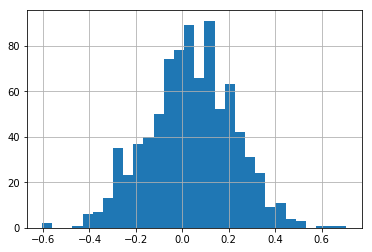

In [262]:
(switched3['season_W/L%_x']-switched3['season_W/L%_y']).hist(bins=30)

In [263]:
stats.ttest_rel(switched['season_W/L%_x'],switched['season_W/L%_y'])

Ttest_relResult(statistic=0.6167756936029778, pvalue=0.5378966958985033)

In [221]:
stats.ttest_ind(switched['season_W/L%_x'],same['season_W/L%_x'])

Ttest_indResult(statistic=-7.972564270249235, pvalue=4.864731283128729e-15)

In [208]:
switched[switched['season_W/L%_x']<switched['season_W/L%_y']].shape

(127, 3)

In [258]:
switched3.shape

(854, 2)

In [204]:
switched['season_W/L%_x'].shape

(274,)

In [209]:
switched

season_W/L%_x  season_W/L%_y  after/before
Year_x Team                                            
1982   ATL           0.512          0.392      1.306122
       CLE           0.220          0.273      0.805861
       LAL           0.704          0.659      1.068285
       NJN           0.537          0.343      1.565598
       UTA           0.274          0.341      0.803519
1983   CLE           0.280          0.220      1.272727
       NJN           0.333          0.537      0.620112
       NYK           0.537          0.402      1.335821
1984   ATL           0.488          0.524      0.931298
       BOS           0.756          0.683      1.106881
       CHI           0.329          0.341      0.964809
       DET           0.598          0.451      1.325942
       GSW           0.451          0.366      1.232240
       HOU           0.354          0.171      2.070175
       NJN           0.549          0.333      1.648649
       SAS           0.510          0.646      0.789474
1985   CLE           0.439          0.341      1.287390
       IND           0.268          0.317      0.845426
       SAS           0.500          0.510      0.980392
1986   CHI           0.366          0.463      0.790497
       NJN           0.476          0.512      0.929687
       PHI           0.659          0.707      0.932107
       SEA           0.378          0.378      1.000000
       WSB           0.538          0.488      1.102459
1987   CHI           0.488          0.366      1.333333
       CLE           0.378          0.373      1.013405
       GSW           0.512          0.366      1.398907
       IND           0.500          0.317      1.577287
       POR           0.598          0.488      1.225410
       SAS           0.341          0.427      0.798595
...                    ...            ...           ...
2015   DEN           0.435          0.439      0.990888
       DET           0.390          0.420      0.928571
       GSW           0.817          0.622      1.313505
       LAL           0.256          0.329      0.778116
       MIL           0.500          0.183      2.732240
       MIN           0.195          0.488      0.399590
       NYK           0.207          0.451      0.458980
       SAC           0.250          0.341      0.733138
       UTA           0.463          0.305      1.518033
2016   BRK           0.244          0.463      0.526998
       CHI           0.512          0.610      0.839344
       DEN           0.402          0.435      0.924138
       HOU           0.521          0.683      0.762811
       MIN           0.354          0.195      1.815385
       NOP           0.366          0.549      0.666667
       OKC           0.671          0.549      1.222222
       ORL           0.427          0.333      1.282282
       SAC           0.402          0.250      1.608000
2017   BRK           0.244          0.244      1.000000
       CLE           0.622          0.732      0.849727
       HOU           0.671          0.521      1.287908
       IND           0.512          0.549      0.932605
       LAL           0.317          0.207      1.531401
       MEM           0.524          0.512      1.023437
       MIN           0.378          0.354      1.067797
       NYK           0.378          0.426      0.887324
       ORL           0.354          0.427      0.829040
       PHO           0.293          0.286      1.024476
       SAC           0.390          0.402      0.970149
       WAS           0.598          0.500      1.196000

[274 rows x 3 columns]

In [266]:
switched.head(10)

season_W/L%_x  season_W/L%_y  after/before
Year_x Team                                            
1982   ATL           0.512          0.392      1.306122
       CLE           0.220          0.273      0.805861
       LAL           0.704          0.659      1.068285
       NJN           0.537          0.343      1.565598
       UTA           0.274          0.341      0.803519
1983   CLE           0.280          0.220      1.272727
       NJN           0.333          0.537      0.620112
       NYK           0.537          0.402      1.335821
1984   ATL           0.488          0.524      0.931298
       BOS           0.756          0.683      1.106881

In [268]:
switched3.head(20)

season_W/L%_x  season_W/L%_y
Year_x Tm                               
1981   BOS          0.756       0.295000
1982   ATL          0.512       0.425556
       BOS          0.768       0.183000
       CLE          0.220       0.371933
       DAL          0.341       0.341000
       DEN          0.561       0.341000
       DET          0.476       0.447667
       GSW          0.549       0.549000
       HOU          0.561       0.476000
       IND          0.427       0.604000
       KCK          0.366       0.256000
       LAL          0.704       0.614222
       MIL          0.671       0.411000
       NJN          0.537       0.446000
       NYK          0.402       0.343500
       PHO          0.561       0.537000
       SAS          0.585       0.371200
       SDC          0.207       0.513000
       SEA          0.634       0.439000
       UTA          0.274       0.341000